<a href="https://colab.research.google.com/github/pja11111/spotify2023/blob/main/spotify2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pickle

In [3]:
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')

df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,263,45,10,826
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,126,58,14,382
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,207,91,14,949
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,207,125,12,548
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,133,87,15,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,13,37,1,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,0,8,0,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,0,7,0,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,26,17,0,0


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df#หาค่า Duplicate ใน Dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts]
Index: []


In [6]:
X = df.drop(columns='streams')
X

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,43,263,45,10,826
1,LALA,Myke Towers,1,2023,3,23,1474,48,48,126,58,14,382
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,94,207,91,14,949
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,116,207,125,12,548
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,84,133,87,15,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,61,13,37,1,0
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,4,0,8,0,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,2,0,7,0,0
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,29,26,17,0,0


In [7]:
df = df.drop('artist_count', axis=1)
df

,track_name,artist(s)_name,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14,553,147,141381703,43,263,45,10,826
1,LALA,Myke Towers,2023,3,23,1474,48,133716286,48,126,58,14,382
2,vampire,Olivia Rodrigo,2023,6,30,1397,113,140003974,94,207,91,14,949
3,Cruel Summer,Taylor Swift,2019,8,23,7858,100,800840817,116,207,125,12,548
4,WHERE SHE GOES,Bad Bunny,2023,5,18,3133,50,303236322,84,133,87,15,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,2022,11,3,953,0,91473363,61,13,37,1,0
949,Bigger Than The Whole Sky,Taylor Swift,2022,10,21,1180,0,121871870,4,0,8,0,0
950,A Veces (feat. Feid),"Feid, Paulo Londra",2022,11,3,573,0,73513683,2,0,7,0,0
951,En La De Ella,"Feid, Sech, Jhayco",2022,10,20,1320,0,133895612,29,26,17,0,0


In [8]:
y = df['streams']
y

0      141381703
1      133716286
2      140003974
3      800840817
4      303236322
         ...    
948     91473363
949    121871870
950     73513683
951    133895612
952     96007391
Name: streams, Length: 953, dtype: object

In [9]:
df.shape

(953, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   released_year         953 non-null    int64 
 3   released_month        953 non-null    int64 
 4   released_day          953 non-null    int64 
 5   in_spotify_playlists  953 non-null    int64 
 6   in_spotify_charts     953 non-null    int64 
 7   streams               953 non-null    object
 8   in_apple_playlists    953 non-null    int64 
 9   in_apple_charts       953 non-null    int64 
 10  in_deezer_playlists   953 non-null    object
 11  in_deezer_charts      953 non-null    int64 
 12  in_shazam_charts      903 non-null    object
dtypes: int64(8), object(5)
memory usage: 96.9+ KB


In [11]:
df.describe()

,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317
std,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599
min,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000
25%,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000
50%,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000
75%,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000
max,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000


In [12]:
df.isnull().sum()

track_name               0
artist(s)_name           0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
dtype: int64

In [13]:
df#หาค่า Duplicate ใน Dataset
df = pd.read_csv('/content/spotify-2023.csv', encoding='ISO-8859-1')
duplicates = df[df.duplicated()]
print(duplicates)

Empty DataFrame
Columns: [track_name, artist(s)_name, artist_count, released_year, released_month, released_day, in_spotify_playlists, in_spotify_charts, streams, in_apple_playlists, in_apple_charts, in_deezer_playlists, in_deezer_charts, in_shazam_charts]
Index: []


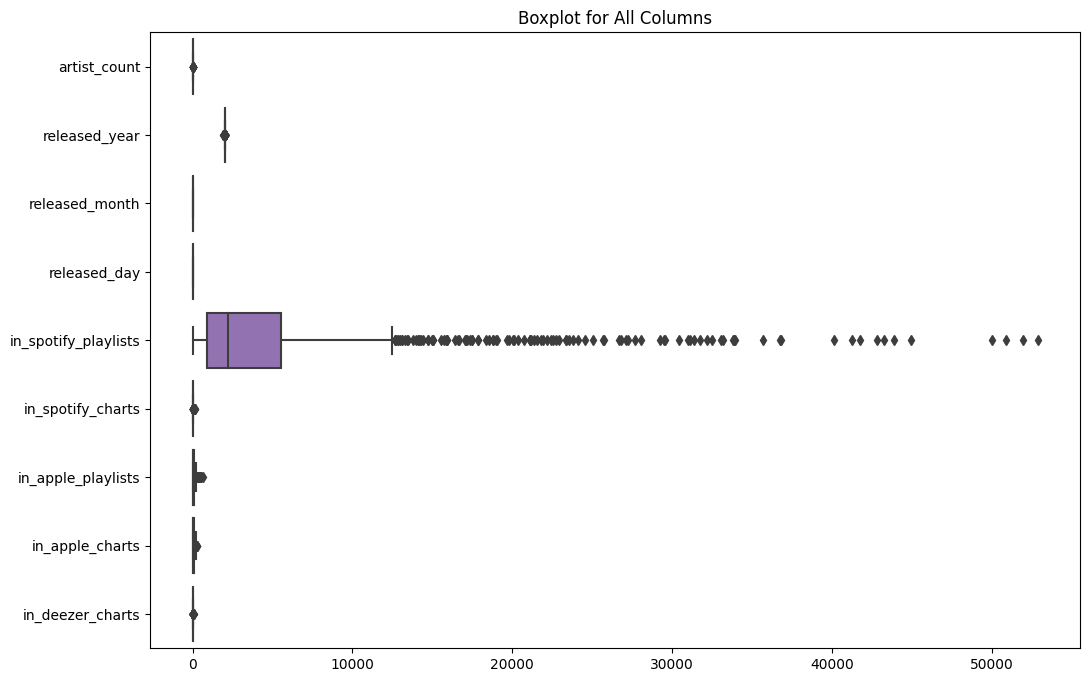

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# สร้างแผนภูมิ Boxplot โดยใช้ Seaborn
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient="h")  # orient="h" หมายถึงแสดงแนวนอน
plt.title('Boxplot for All Columns')
plt.show()

In [15]:

df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df.dropna(subset=['streams'], inplace=True)

df['streams'] = df['streams'].astype(int)

In [16]:

X = df[['in_spotify_playlists', 'in_spotify_charts']]
y = df['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:

model = SVR()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 3.3896091990073344e+17
R-squared (R2): -0.12227917796053833


In [18]:

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 1.1312563160592974e+17
R-squared (R2): 0.625447851386083


In [19]:
# เปลี่ยนอีคอลัมน์ streams ให้เป็น int
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

df.dropna(subset=['streams'], inplace=True)

df['streams'] = df['streams'].astype(int)

In [20]:
# แบ่ง X, y, train, test ก็ประมาณนี้แหละ
X = df[['in_spotify_playlists', 'in_spotify_charts']]
y = df['streams']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Linear Regression:
Mean Squared Error (MSE): 1.1312563160592974e+17
R-squared (R2): 0.625447851386083
SVR:
Mean Squared Error (MSE): 3.3896091990073344e+17
R-squared (R2): -0.12227917796053833


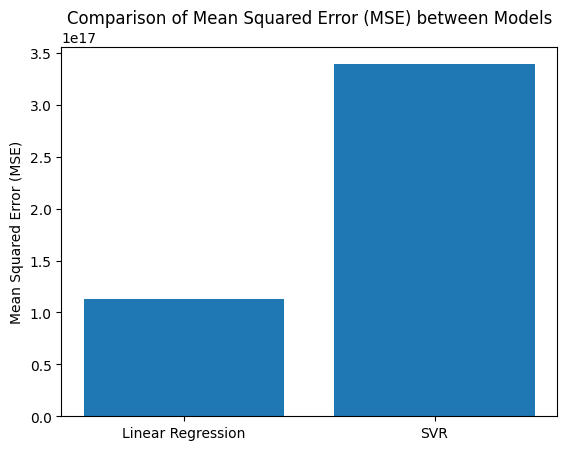

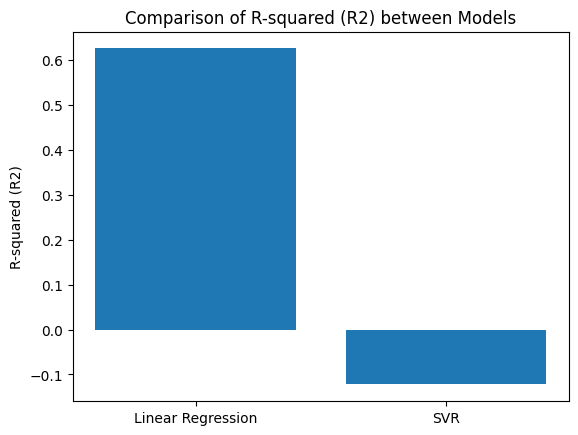

In [21]:

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# SVR
svr_model = SVR()
svr_model.fit(X_train, y_train)
svr_y_pred = svr_model.predict(X_test)

# Calculate MSE and R2 for Linear Regression
linear_mse = mean_squared_error(y_test, linear_y_pred)
linear_r2 = r2_score(y_test, linear_y_pred)

# Calculate MSE and R2 for SVR
svr_mse = mean_squared_error(y_test, svr_y_pred)
svr_r2 = r2_score(y_test, svr_y_pred)

# Compare the results
print("Linear Regression:")
print(f'Mean Squared Error (MSE): {linear_mse}')
print(f'R-squared (R2): {linear_r2}')

print("SVR:")
print(f'Mean Squared Error (MSE): {svr_mse}')
print(f'R-squared (R2): {svr_r2}')

models = ['Linear Regression', 'SVR']
mse_values = [linear_mse, svr_mse]

plt.bar(models, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) between Models')
plt.show()

# Create a bar chart to compare R2
r2_values = [linear_r2, svr_r2]

plt.bar(models, r2_values)
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) between Models')
plt.show()

In [22]:

from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_y_pred = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)
print("K-Nearest Neighbors (KNN):")
print(f'Mean Squared Error (MSE): {knn_mse}')
print(f'R-squared (R2): {knn_r2}')

K-Nearest Neighbors (KNN):
Mean Squared Error (MSE): 1.0204777609800411e+17
R-squared (R2): 0.6621259633543929


In [23]:
from sklearn.neighbors import KNeighborsRegressor

knn_model = KNeighborsRegressor(n_neighbors=5)  # สร้างโมเดล KNN โดยระบุ n_neighbors
knn_model.fit(X_train, y_train)  # ฝึกโมเดลด้วยข้อมูลการฝึก

KNeighborsRegressor()

In [24]:
knn_y_pred = knn_model.predict(X_test)  # ทำนายค่าบนข้อมูลทดสอบ

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

knn_mse = mean_squared_error(y_test, knn_y_pred)
knn_r2 = r2_score(y_test, knn_y_pred)

print(f'Mean Squared Error (MSE): {knn_mse}')
print(f'R-squared (R2): {knn_r2}')

Mean Squared Error (MSE): 1.0204777609800411e+17
R-squared (R2): 0.6621259633543929


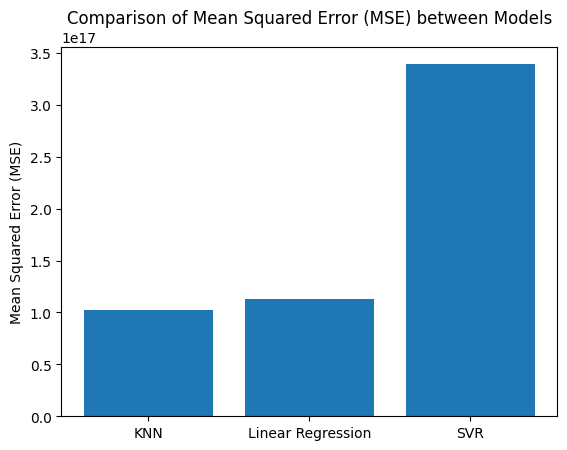

In [26]:
import matplotlib.pyplot as plt
models = ['KNN', 'Linear Regression', 'SVR']
mse_values = [knn_mse, linear_mse, svr_mse]

plt.bar(models, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) between Models')
plt.show()

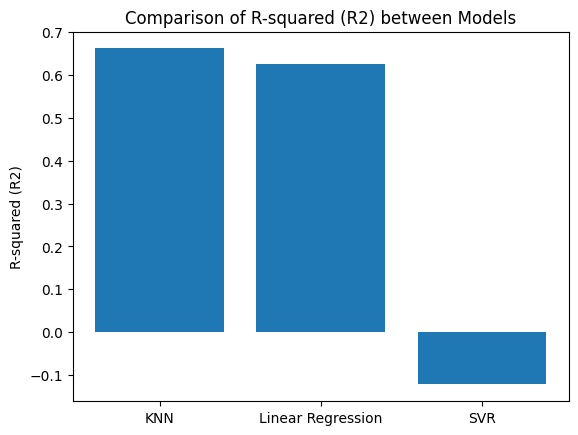

In [27]:
r2_values = [knn_r2, linear_r2, svr_r2]

plt.bar(models, r2_values)
plt.ylabel('R-squared (R2)')
plt.title('Comparison of R-squared (R2) between Models')
plt.show()

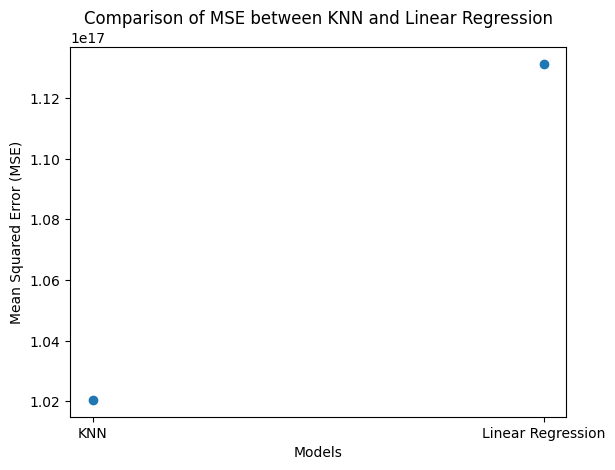

In [28]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

models = ['KNN', 'Linear Regression']
mse_values = [knn_mse, linear_mse]

plt.scatter(models, mse_values)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between KNN and Linear Regression')
plt.show()

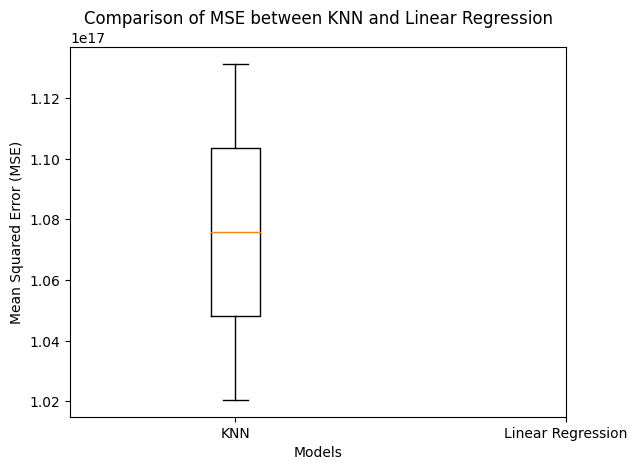

In [29]:
import matplotlib.pyplot as plt

models = ['KNN', 'Linear Regression']
mse_values = [knn_mse, linear_mse]

plt.boxplot(mse_values)
plt.xticks([1, 2], models)
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of MSE between KNN and Linear Regression')
plt.show()

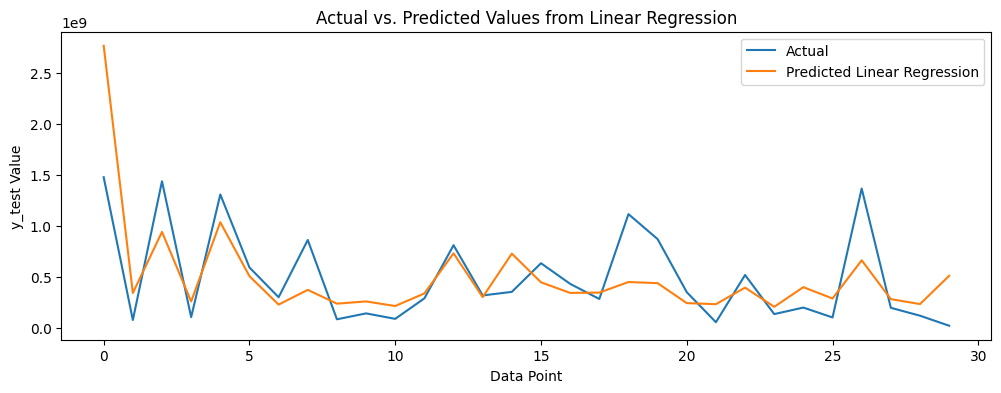

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่างเพื่อทดสอบ
y_test_sample = y_test[:30]  # เลือกข้อมูลทดสอบสำหรับ 30 จุดแรก

# สร้างกราฟเส้นเพื่อแสดงค่าที่ทดสอบ (Actual) และค่าทำนาย (Predicted) จาก Linear Regression
plt.figure(figsize=(12, 4))  # กำหนดขนาดกราฟ

# สร้างกราฟเส้น Actual
sns.lineplot(x=range(len(y_test_sample)), y=y_test_sample, label='Actual')

# สร้างข้อมูลค่าทำนาย Linear Regression (ในที่นี้เราใช้ข้อมูลทดสอบและไม่ใช่ข้อมูลฝึกอบรม)
y_lr_pred_sample = linear_model.predict(X_test[:30])

# สร้างกราฟเส้น Predicted Linear Regression
sns.lineplot(x=range(len(y_lr_pred_sample)), y=y_lr_pred_sample, label='Predicted Linear Regression')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.title("Actual vs. Predicted Values from Linear Regression")
plt.show()

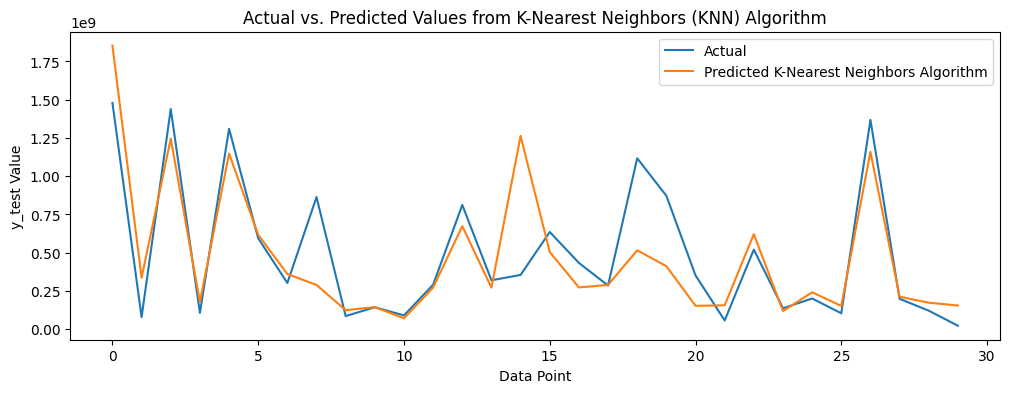

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่างเพื่อทดสอบ
y_test_sample = y_test[:30]  # เลือกข้อมูลทดสอบสำหรับ 30 จุดแรก

# สร้างกราฟเส้นเพื่อแสดงค่าที่ทดสอบ (Actual) และค่าทำนาย (Predicted) จาก K-Nearest Neighbors (KNN) Algorithm
plt.figure(figsize=(12, 4))  # กำหนดขนาดกราฟ

# สร้างกราฟเส้น Actual
sns.lineplot(x=range(len(y_test_sample)), y=y_test_sample, label='Actual')

# สร้างข้อมูลค่าทำนายจาก K-Nearest Neighbors (KNN) Algorithm (ในที่นี้เราใช้ข้อมูลทดสอบและไม่ใช่ข้อมูลฝึกอบรม)
y_knn_pred_sample = knn_model.predict(X_test[:30])  # knn_model เป็นโมเดล KNN

# สร้างกราฟเส้น Predicted K-Nearest Neighbors Algorithm
sns.lineplot(x=range(len(y_knn_pred_sample)), y=y_knn_pred_sample, label='Predicted K-Nearest Neighbors Algorithm')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.title("Actual vs. Predicted Values from K-Nearest Neighbors (KNN) Algorithm")
plt.show()

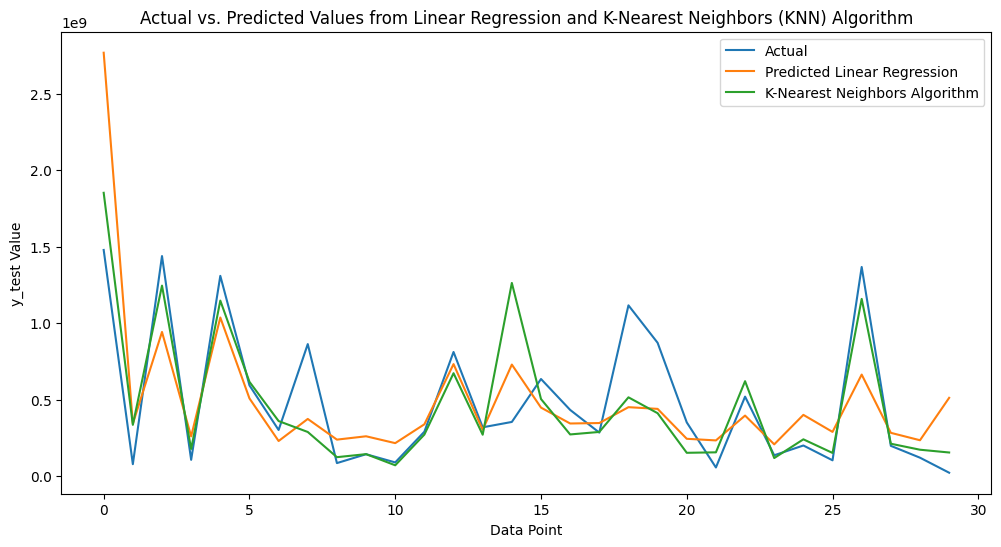

In [32]:

import seaborn as sns
import matplotlib.pyplot as plt

# สร้างข้อมูลตัวอย่างเพื่อทดสอบ
y_test_sample = y_test[:30]  # เลือกข้อมูลทดสอบสำหรับ 30 จุดแรก

# สร้างกราฟเส้นเพื่อแสดงค่าที่ทดสอบ (Actual) และค่าทำนายจาก Linear Regression
plt.figure(figsize=(12, 6))  # กำหนดขนาดกราฟ

# สร้างกราฟเส้น Actual
sns.lineplot(x=range(len(y_test_sample)), y=y_test_sample, label='Actual')

# สร้างข้อมูลค่าทำนายจาก Linear Regression (ในที่นี้เราใช้ข้อมูลทดสอบและไม่ใช่ข้อมูลฝึกอบรม)
y_lr_pred_sample = linear_model.predict(X_test[:30])

# สร้างกราฟเส้น Predicted Linear Regression
sns.lineplot(x=range(len(y_lr_pred_sample)), y=y_lr_pred_sample, label='Predicted Linear Regression')

# สร้างข้อมูลค่าทำนายจาก K-Nearest Neighbors (KNN) Algorithm (ในที่นี้เราใช้ข้อมูลทดสอบและไม่ใช่ข้อมูลฝึกอบรม)
y_knn_pred_sample = knn_model.predict(X_test[:30])

# สร้างกราฟเส้น Predicted K-Nearest Neighbors Algorithm
sns.lineplot(x=range(len(y_knn_pred_sample)), y=y_knn_pred_sample, label='K-Nearest Neighbors Algorithm')

plt.xlabel("Data Point")
plt.ylabel("y_test Value")
plt.legend()
plt.title("Actual vs. Predicted Values from Linear Regression and K-Nearest Neighbors (KNN) Algorithm")
plt.show()

In [33]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
# สร้างโมเดล Decision Tree
decision_tree_model = DecisionTreeRegressor(random_state=42)

# สร้างโมเดล Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

# ฝึกโมเดล Decision Tree
decision_tree_model.fit(X_train, y_train)

# ฝึกโมเดล Random Forest
random_forest_model.fit(X_train, y_train)

# ทำนายค่าด้วย Decision Tree
decision_tree_predictions = decision_tree_model.predict(X_test)

# ทำนายค่าด้วย Random Forest
random_forest_predictions = random_forest_model.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score

# คำนวณ MSE และ R2 สำหรับ Decision Tree
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
decision_tree_r2 = r2_score(y_test, decision_tree_predictions)

# คำนวณ MSE และ R2 สำหรับ Random Forest
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)
random_forest_r2 = r2_score(y_test, random_forest_predictions)

print("Decision Tree MSE:", decision_tree_mse)
print("Decision Tree R2:", decision_tree_r2)

print("Random Forest MSE:", random_forest_mse)
print("Random Forest R2:", random_forest_r2)

Decision Tree MSE: 1.5135407296536416e+17
Decision Tree R2: 0.4988757859215951
Random Forest MSE: 9.530045558036718e+16
Random Forest R2: 0.6844659349540317


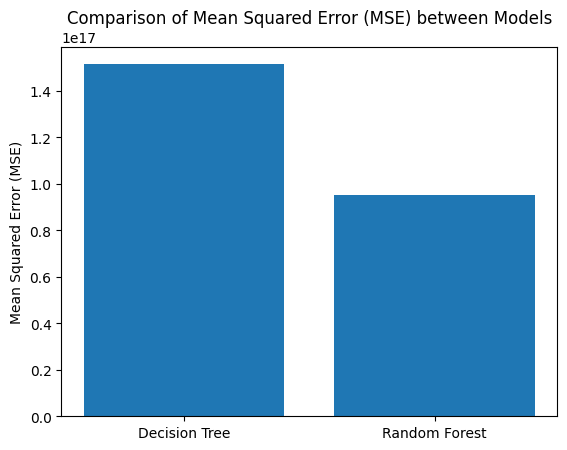

In [34]:
import matplotlib.pyplot as plt

# สร้างกราฟเปรียบเทียบค่า MSE ระหว่าง Decision Tree และ Random Forest
models = ['Decision Tree', 'Random Forest']
mse_values = [decision_tree_mse, random_forest_mse]

plt.bar(models, mse_values)
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Comparison of Mean Squared Error (MSE) between Models')
plt.show()

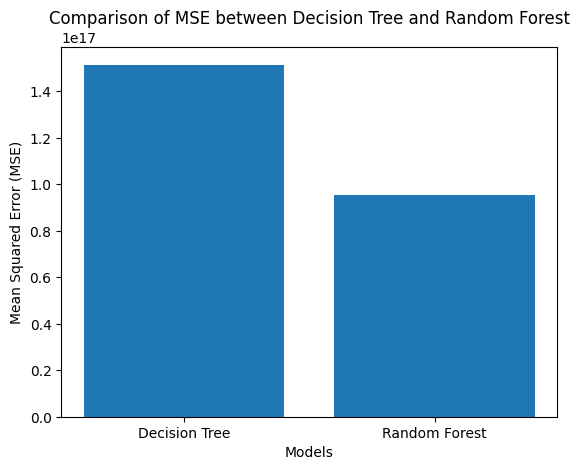

In [35]:
import matplotlib.pyplot as plt

# ข้อมูล MSE สำหรับ Decision Tree และ Random Forest
models = ['Decision Tree', 'Random Forest']
mse_values = [1.5135407296536416e+17, 9.530045558036718e+16]

# สร้างกราฟแท่งเปรียบเทียบค่า MSE
plt.bar(models, mse_values)

# กำหนดคำอธิบายในแกน X และ Y
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')

# เพิ่มชื่อกราฟ
plt.title('Comparison of MSE between Decision Tree and Random Forest')

# แสดงกราฟ
plt.show()

In [36]:
import numpy as np

# สร้างข้อมูลฝึกอบรม (X_train) และผลลัพธ์ (Y_train) แบบสุ่ม
np.random.seed(0)
X_train = np.random.rand(80, 1)  # สร้างข้อมูล X_train 80 ตัวอย่าง
Y_train = 3 * X_train.squeeze() + np.random.rand(80)  # สร้างข้อมูล Y_train โดยเพิ่มข้อความสุ่ม

# ตรวจสอบขนาดของ X_train และ Y_train
print(X_train.shape)  # ควรเป็น (80, 1) หรือ (80,)
print(Y_train.shape)  # ควรเป็น (80,)

(80, 1)
(80,)


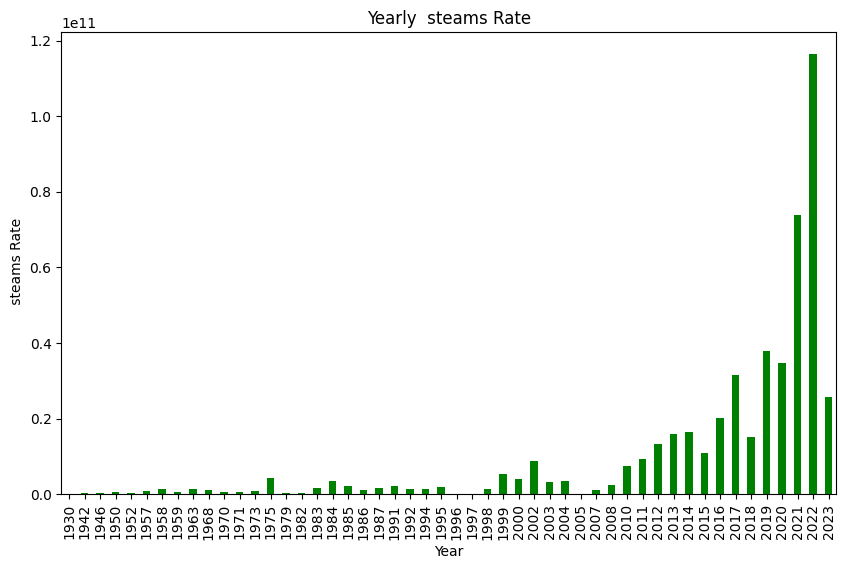

In [37]:
grouped = df.groupby('released_year')['streams'].sum()  # เปลี่ยน 'value' เป็น 'steam'
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='green')
plt.title('Yearly  steams Rate')
plt.xlabel('Year')
plt.ylabel(' steams Rate')
plt.show()

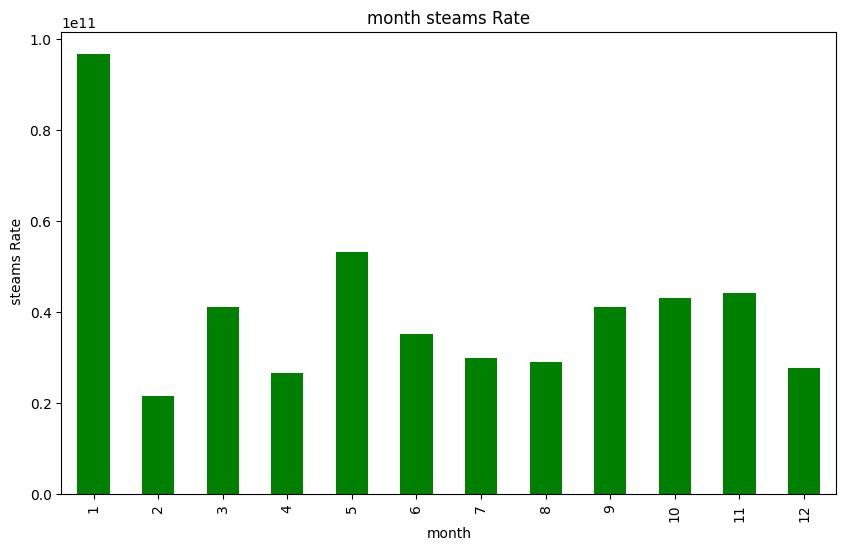

In [38]:
grouped = df.groupby('released_month')['streams'].sum()  # เปลี่ยน 'value' เป็น 'steam'
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='green')
plt.title('month steams Rate')
plt.xlabel('month')
plt.ylabel(' steams Rate')
plt.show()

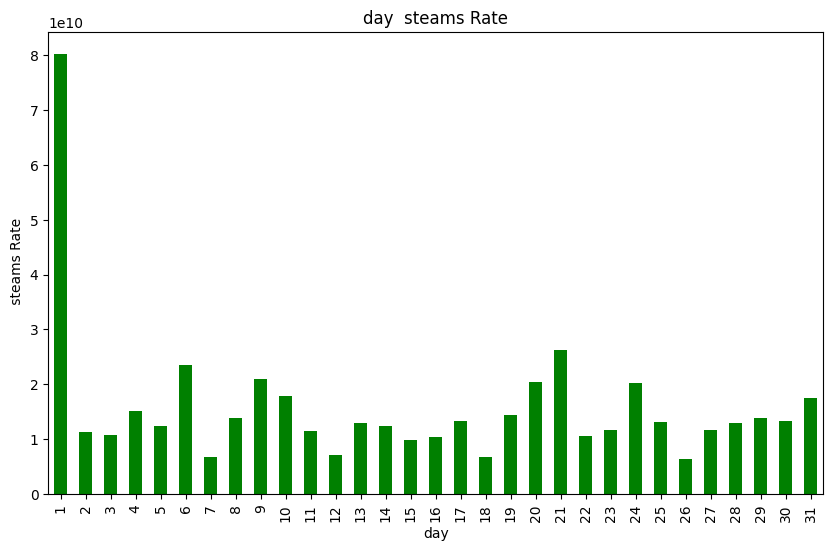

In [39]:
grouped = df.groupby('released_day')['streams'].sum()  # เปลี่ยน 'value' เป็น 'steam '
# สร้างกราฟแท่ง
plt.figure(figsize=(10, 6))
grouped.plot(kind='bar', color='green')
plt.title('day  steams Rate')
plt.xlabel('day')
plt.ylabel(' steams Rate')
plt.show()

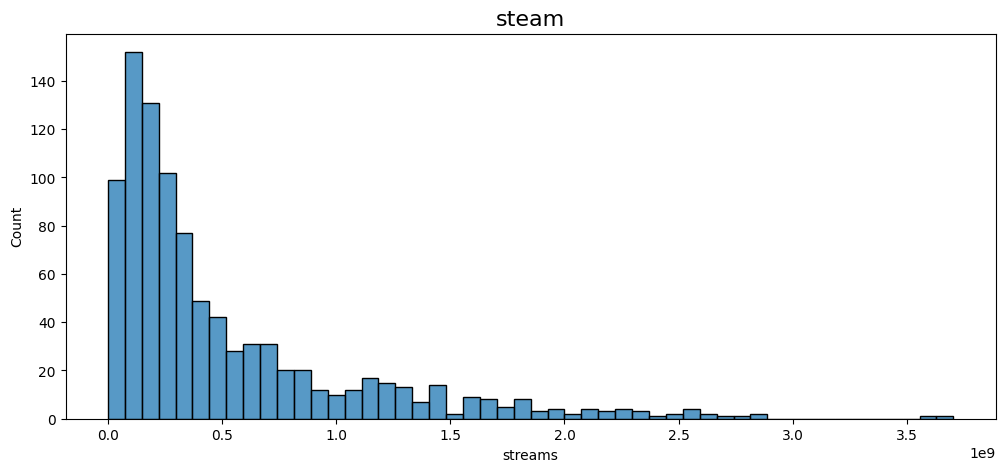

In [40]:
plt.figure(figsize=(12,5))
sns.histplot(df['streams'],bins=50)
plt.title('steam',
          fontsize=16)
plt.show()

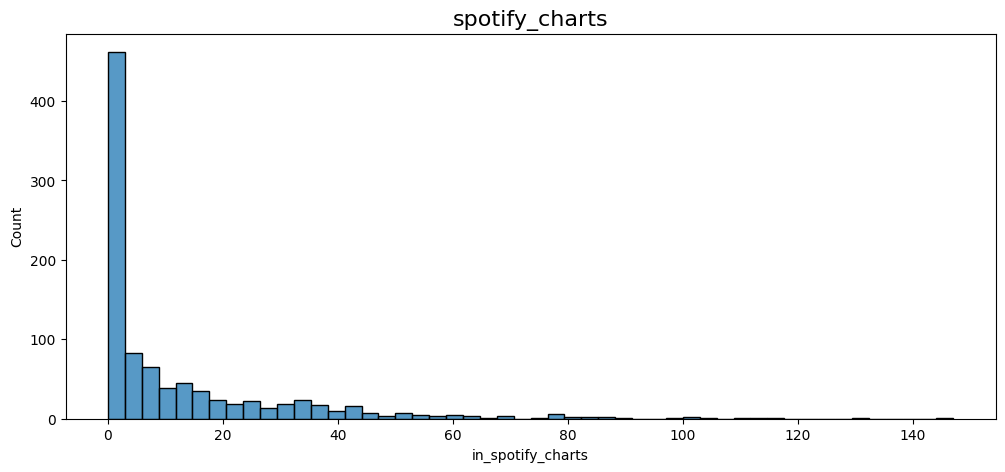

In [41]:
plt.figure(figsize=(12,5))
sns.histplot(df['in_spotify_charts'],bins=50)
plt.title('spotify_charts',
          fontsize=16)
plt.show()

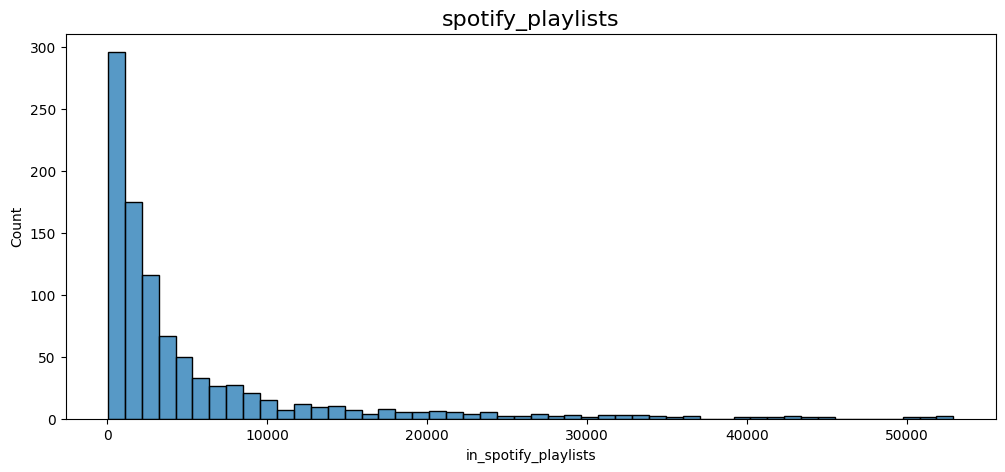

In [42]:
plt.figure(figsize=(12,5))
sns.histplot(df['in_spotify_playlists'],bins=50)
plt.title('spotify_playlists',
          fontsize=16)
plt.show()

In [43]:
selected_columns = df[['streams','track_name','artist(s)_name','released_year','released_month','released_day']]
selected_columns

,streams,track_name,artist(s)_name,released_year,released_month,released_day
0,141381703,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2023,7,14
1,133716286,LALA,Myke Towers,2023,3,23
2,140003974,vampire,Olivia Rodrigo,2023,6,30
3,800840817,Cruel Summer,Taylor Swift,2019,8,23
4,303236322,WHERE SHE GOES,Bad Bunny,2023,5,18
...,...,...,...,...,...,...
948,91473363,My Mind & Me,Selena Gomez,2022,11,3
949,121871870,Bigger Than The Whole Sky,Taylor Swift,2022,10,21
950,73513683,A Veces (feat. Feid),"Feid, Paulo Londra",2022,11,3
951,133895612,En La De Ella,"Feid, Sech, Jhayco",2022,10,20


In [44]:
duplicates = df[df.duplicated()]
duplicates

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,in_deezer_charts,in_shazam_charts


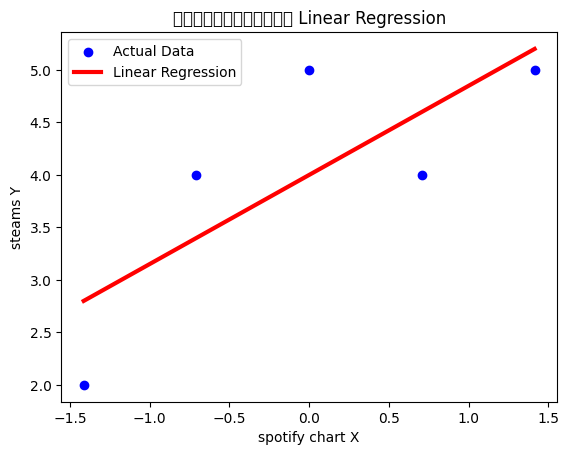

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# สร้างข้อมูลตัวอย่าง (แทนที่ด้วยข้อมูลจริงของคุณ)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # ตัวอย่างข้อมูล X
y = np.array([2, 4, 5, 4, 5])  # ตัวอย่างค่าเป้าหมาย y

# ปรับค่า (scaling) ข้อมูล
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# สร้างและฝึกเรียนโมเดล Linear Regression
model = LinearRegression()
model.fit(X_norm, y)

# ทำการทำนายค่า
predicted_values = model.predict(X_norm)

# พล็อตกราฟเพื่อแสดงการทำนายข้อมูล
plt.scatter(X_norm, y, color='blue', label='Actual Data')  # พล็อตข้อมูลจริง
plt.plot(X_norm, predicted_values, color='red', linewidth=3, label='Linear Regression')  # พล็อตเส้น Linear Regression

# เพิ่มรายละเอียด
plt.xlabel('spotify chart X')
plt.ylabel('steams Y')
plt.title('การทำนายด้วย Linear Regression')
plt.legend()

# แสดงกราฟ
plt.show()








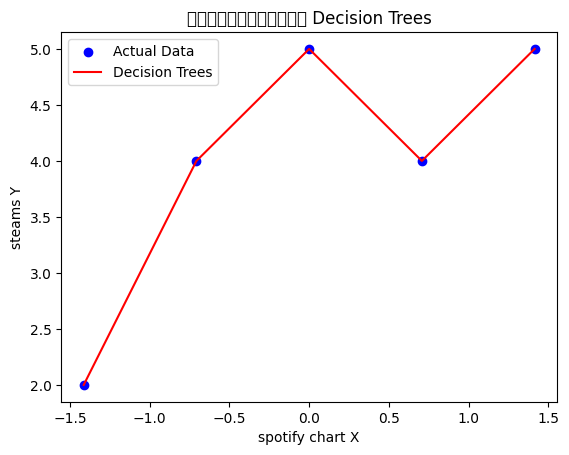

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
# สร้างข้อมูลตัวอย่าง (แทนที่ด้วยข้อมูลจริงของคุณ)
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # ตัวอย่างข้อมูล X
y = np.array([2, 4, 5, 4, 5])  # ตัวอย่างค่าเป้าหมาย y

# ปรับค่า (scaling) ข้อมูล
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# สร้างและฝึกเรียนโมเดล Decision Trees
model = DecisionTreeRegressor()
model.fit(X_norm, y)
# ทำการทำนายค่า
predicted_values = model.predict(X_norm)
# พล็อตกราฟเพื่อแสดงการทำนายข้อมูล
plt.scatter(X_norm, y, color='blue', label='Actual Data')  # พล็อตข้อมูลจริง
plt.plot(X_norm, predicted_values, color='red', label='Decision Trees')  # พล็อตเส้น Decision Trees

# เพิ่มรายละเอียด
plt.xlabel('spotify chart X')
plt.ylabel('steams Y')
plt.title('การทำนายด้วย Decision Trees')
plt.legend()

# แสดงกราฟ
plt.show()